In [7]:
import config

In [8]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import v2
import torch

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Dataset Resolution #

In [10]:
train_test = DataLoader(
    ImageFolder(
        config.data_root / 'pisa-monuments' / 'train_test',
        transform=v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True)
        ])
    ),
    batch_size=1,
    shuffle=False
)

val = DataLoader(
    ImageFolder(
        config.data_root / 'pisa-monuments' / 'val',
        transform=v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True)
        ])
    ),
    batch_size=1,
    shuffle=False
)

In [11]:
from fractions import Fraction
sizes = np.zeros((2, len(train_test)), dtype=np.int32)

In [12]:
ratios = set()
for i, (img, cat) in enumerate(train_test):
    res = img.size()[2:]
    ratios.add(Fraction(res[0], res[1]))
    sizes[0, i], sizes[1, i] = res
    
for i, (img, cat) in enumerate(val):
    res = img.size()[2:]
    ratios.add(Fraction(res[0], res[1]))
    sizes[0, i], sizes[1, i] = res

The shortest edge of the image has very large variance

The dataset consists of very large variety of aspect ratios, many of which are non-standard

In [13]:
ratios

{Fraction(139, 500),
 Fraction(2, 5),
 Fraction(59, 125),
 Fraction(239, 500),
 Fraction(12, 25),
 Fraction(249, 500),
 Fraction(1, 2),
 Fraction(129, 250),
 Fraction(267, 500),
 Fraction(137, 250),
 Fraction(277, 500),
 Fraction(139, 250),
 Fraction(14, 25),
 Fraction(281, 500),
 Fraction(141, 250),
 Fraction(283, 500),
 Fraction(291, 500),
 Fraction(73, 125),
 Fraction(299, 500),
 Fraction(151, 250),
 Fraction(61, 100),
 Fraction(77, 125),
 Fraction(78, 125),
 Fraction(313, 500),
 Fraction(157, 250),
 Fraction(63, 100),
 Fraction(79, 125),
 Fraction(319, 500),
 Fraction(321, 500),
 Fraction(161, 250),
 Fraction(323, 500),
 Fraction(81, 125),
 Fraction(13, 20),
 Fraction(163, 250),
 Fraction(157, 240),
 Fraction(82, 125),
 Fraction(329, 500),
 Fraction(33, 50),
 Fraction(331, 500),
 Fraction(83, 125),
 Fraction(333, 500),
 Fraction(167, 250),
 Fraction(67, 100),
 Fraction(84, 125),
 Fraction(337, 500),
 Fraction(169, 250),
 Fraction(339, 500),
 Fraction(17, 25),
 Fraction(341, 500),
 

**Histogram of aspect ratios**

(array([ 2.,  6., 27., 47., 11., 13.,  7.,  4., 21., 19.,  5.,  4.,  3.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.278     , 0.4037648 , 0.52952961, 0.65529441, 0.78105922,
        0.90682402, 1.03258883, 1.15835363, 1.28411844, 1.40988324,
        1.53564804, 1.66141285, 1.78717765, 1.91294246, 2.03870726,
        2.16447207, 2.29023687, 2.41600168, 2.54176648, 2.66753128,
        2.79329609]),
 <BarContainer object of 20 artists>)

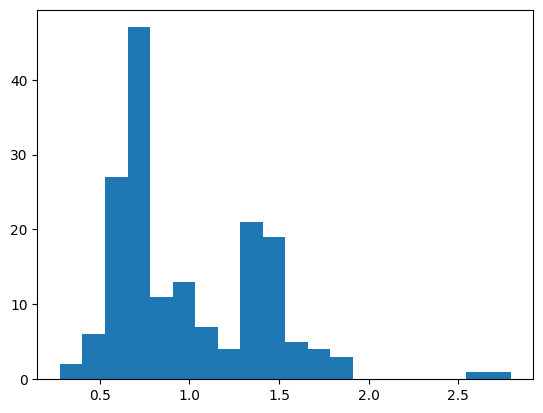

In [14]:
plt.hist(np.array([f.numerator / f.denominator for f in ratios]), 20)

(array([  2.,   0.,   2.,   7., 113.,  17., 140.,   0.,   8., 605.]),
 array([179. , 211.1, 243.2, 275.3, 307.4, 339.5, 371.6, 403.7, 435.8,
        467.9, 500. ]),
 <BarContainer object of 10 artists>)

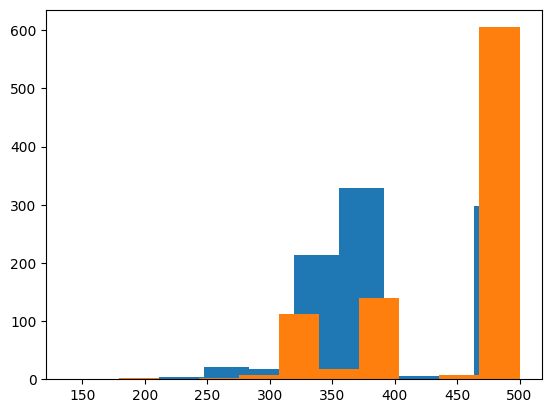

In [15]:
plt.hist(sizes[0])
plt.hist(sizes[1])

## Aspect Ratio ##

* Aspect ratios have 2 peaks around 3/4 and 4/3, however it contains a lot of variance
* There is an outlier around 2.5

## Resolution ##

* The resolution has one large peak around 350 and another around 500 is consistent with 3/4 and 4/3 and contains expected spread

## Outliers ##

There is an image with very extreme aspect ratio - over 2.5 and an image with very low resolution, less than 200.

There are 2 square images

In [16]:
list(filter(lambda s: s[0] == s[1], sizes.transpose()))

[array([500, 500], dtype=int32), array([500, 500], dtype=int32)]

All of the images with very small shorter edge have very extreme aspect ratio

In [17]:
list(filter(lambda s: min(s) < 250, sizes.transpose()))

[array([500, 179], dtype=int32),
 array([240, 500], dtype=int32),
 array([240, 500], dtype=int32),
 array([236, 500], dtype=int32),
 array([139, 500], dtype=int32),
 array([239, 500], dtype=int32),
 array([249, 500], dtype=int32),
 array([200, 500], dtype=int32),
 array([500, 188], dtype=int32)]

# Class Balance #

In [18]:
train_freq = np.zeros(12)

for x, y in train_test:
    train_freq[y.item()] += 1

In [19]:
train_freq

array([ 83.,  36.,  90., 110.,  42.,  89.,  56., 103.,  73.,  37.,  80.,
        95.])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Pisa-Battistero'),
  Text(1, 0, 'Pisa-Campo_Santo_Esterno'),
  Text(2, 0, 'Pisa-Campo_Santo_Portico'),
  Text(3, 0, 'Pisa-Campo_Santo_Prato'),
  Text(4, 0, 'Pisa-Certosa'),
  Text(5, 0, 'Pisa-Chiesa_della_Spina'),
  Text(6, 0, 'Pisa-Cittadella'),
  Text(7, 0, 'Pisa-Duomo'),
  Text(8, 0, 'Pisa-Palazzo_Orologio'),
  Text(9, 0, 'Pisa-SanPiero'),
  Text(10, 0, 'Pisa-Scuola_Normale'),
  Text(11, 0, 'Pisa-Torre')])

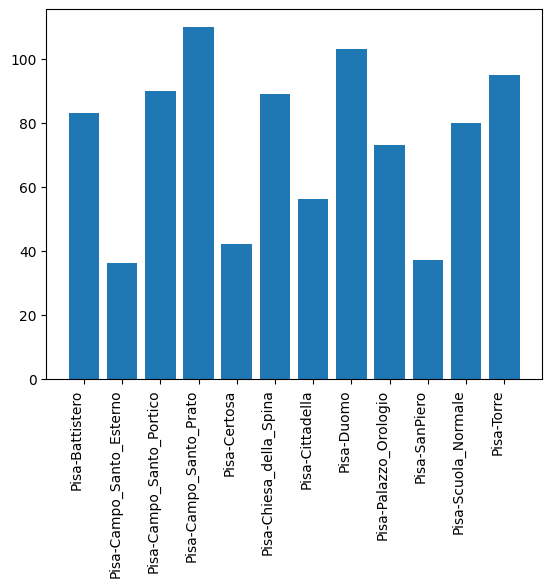

In [20]:
id_to_class = {val: key for (key, val) in train_test.dataset.class_to_idx.items()}
plt.bar(list(map(lambda id: id_to_class[id], range(12))), train_freq)
plt.xticks(rotation=90, ha='right')

Some of the classes are underrepresented

# Recommendation #

1. Use random scale between 300 and 450 pixel for shorter edge
2. Random Crop a sqare of 300x300
3. Remove the images with less than 200 pixel shorter edge 